REQUIRED MODULE

In [ ]:
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import cross_val_score as cross_val_score_inbuilt

from statistics import mean
from statistics import stdev
import math

from sklearn.tree import DecisionTreeClassifier

**QUESTION 1 DECISION TREE**

Initial Data Visualization

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ML Data/titanic.csv")

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print("dataset length:",len(data))
print("dataset shape",data.shape)

dataset length: 891
dataset shape (891, 12)


In [ ]:
print("datadet info:",data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
datadet info: None


In [ ]:
print("data description:",data.describe())

data description:        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  



Data Preprocessing

In [ ]:
print("Percentage of missing values:")
print(((data.isna().sum())/data.shape[0])*100)

Percentage of missing values:
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [ ]:
# Column age neither has very low nor very high error percentage
# Hence grouping by Sex and Pclass columns to fill the missing values of age
print(round(data.groupby(['Sex', 'Pclass'])['Age'].agg(['mean']), 0))

               mean
Sex    Pclass      
female 1       35.0
       2       29.0
       3       22.0
male   1       41.0
       2       31.0
       3       27.0


In [ ]:
data["Age"] = data["Age"].fillna(-1)

for index in range(data.shape[0]):
  if data["Age"][index] == -1:
    if ((data["Sex"][index] == "female") and (data["Pclass"][index] == 1)):
      data["Age"][index] = 34
    elif((data["Sex"][index] == "female") and (data["Pclass"][index] == 2)):
      data["Age"][index] = 29
    elif((data["Sex"][index] == "female") and (data["Pclass"][index] == 3)):
      data["Age"][index] = 22
    elif((data["Sex"][index] == "male") and (data["Pclass"][index] == 1)):
      data["Age"][index] = 41
    elif((data["Sex"][index] == "male") and (data["Pclass"][index] == 2)):
      data["Age"][index] = 31
    elif((data["Sex"][index] == "male") and (data["Pclass"][index] == 3)):
      data["Age"][index] = 27

In [ ]:
print("Percentage of missing values in feature 'Age': ", str((data["Age"].isna().sum())/data.shape[0])+"%")

Percentage of missing values in feature 'Age':  0.0%


In [ ]:
data = data.drop(columns=["Cabin"]) #missing value percentage in cabin column high

In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [ ]:
data.dropna(inplace=True)  #missing value percentage in Embarked column is low

In [ ]:
print("Percentage of missing values in feature 'Embarked': ", str((data["Embarked"].isna().sum())/data.shape[0])+"%")

Percentage of missing values in feature 'Embarked':  0.0%


In [ ]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Dropping Trivial Features

In [ ]:
print("Features in titanic dataset:\n", data.columns)

Features in titanic dataset:
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [ ]:
data.drop(columns = ["PassengerId", "Name", "Ticket"], inplace = True) # passenger ID , Name and Ticket does not affect an Individual's survival hece we can drop these columns

In [ ]:
print("Features in titanic dataset:\n", data.columns)

Features in titanic dataset:
 Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


OUTLIERS

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


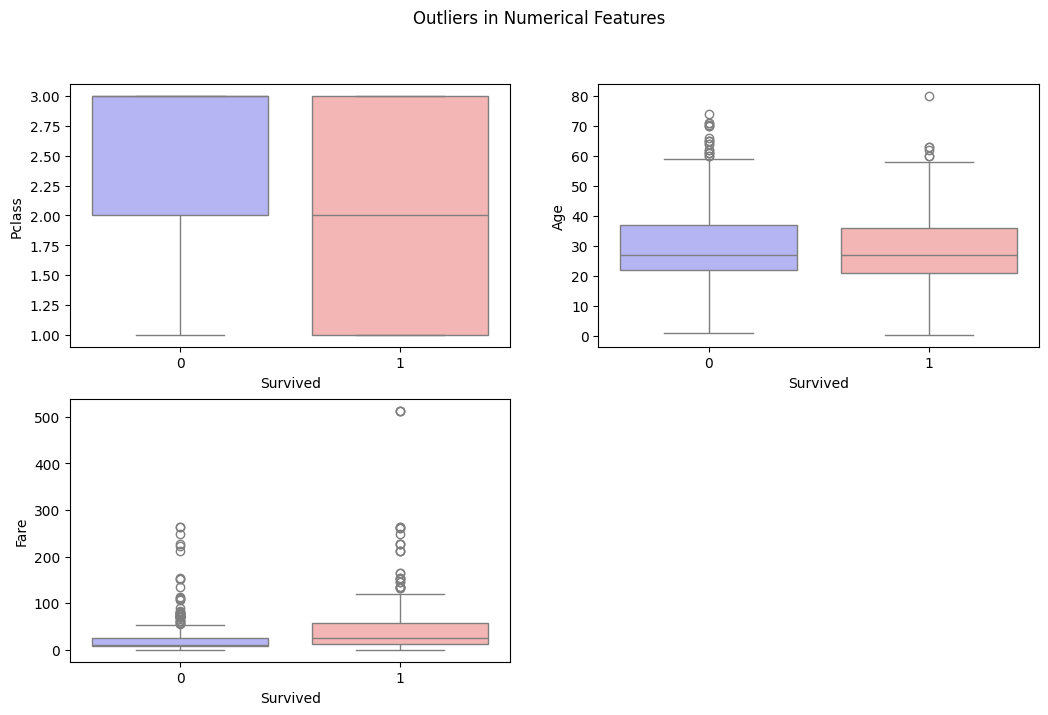

In [ ]:
# Check for outliers
figure, axes = plt.subplots(2, 2, figsize=(12.5, 7.5))
figure.suptitle("Outliers in Numerical Features")
figure.delaxes(axes[1][1])

sns.boxplot(ax=axes[0, 0], data=data, x="Survived", y="Pclass", palette="bwr", hue="Survived", legend=False)
sns.boxplot(ax=axes[0, 1], data=data, x="Survived", y="Age", palette="bwr", hue="Survived", legend=False)
sns.boxplot(ax=axes[1, 0], data=data, x="Survived", y="Fare", palette="bwr", hue="Survived", legend=False)

plt.show()

From the above plots consider the following reasoning:

* Pclass: The feature has only three(3) discrete values; 1, 2, and 3. Hence, no outliers
* Age: The plots show some data values above 60. This is indicative of elderly people travelling in the ship rather than outliers. Hence, considered.
* Fare: Fare values can be large, as shown in the plot, and this is reasonable enough. Hence, this is also considered.

We can conclude that no outliers(of importance) are present in the given dataset.

CATEGORICAL ENCODING

In [ ]:
#check categorical columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


Now, it can be seen from the above statistics that categorical features are as follows:

* Pclass(as concluded in the previous section)
* Sex
* Embarked

Hence, we will perform categorical encoding for the above mentioned features.

In [ ]:
#Pclass
print("Discrete values:\n", data["Pclass"].unique())

Discrete values:
 [3 1 2]


In [ ]:
print("Column 'Sex' before encoding:")
print(data["Sex"][0:5])

data["Sex"].replace("female", 0, inplace = True)
data["Sex"].replace("male", 1, inplace = True)

print("Column 'Sex' after encoding:")
print(data["Sex"][0:5])

Column 'Sex' before encoding:
0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object
Column 'Sex' after encoding:
0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64


In [ ]:
#Embarked
print("Unique values:\n", data["Embarked"].unique())

Unique values:
 ['S' 'C' 'Q']


In [ ]:
def encode_embarked(column):

  for data in column:
    if data == 'S':
      column[column.index(data)] = 0
    elif data == 'C':
      column[column.index(data)] = 1
    else:
      column[column.index(data)] = 2

  return column

In [ ]:
print("Column 'Embarked' before encoding:")
print(data["Embarked"][0:5])

data["Embarked"] = encode_embarked(list(data["Embarked"]))

print("Column 'Embarked' after encoding:")
print(data["Embarked"][0:5])

Column 'Embarked' before encoding:
0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object
Column 'Embarked' after encoding:
0    0
1    1
2    0
3    0
4    0
Name: Embarked, dtype: int64


VISUALIZING FEATURE TARGET DEPENDENCE

In [ ]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

<ipython-input-30-044fb1172308>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(ax = axes[0, 0], data = data, x = "Survived", y = "Pclass", palette = "bwr")
<ipython-input-30-044fb1172308>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(ax = axes[0, 1], data = data, x = "Survived", y = "Sex", palette = "bwr")
<ipython-input-30-044fb1172308>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(ax = axes[0, 2], data = data, x = "Survived", y = "Age", palette = "bwr")
<ipython-input-30-044fb1172308>:9: FutureWarning: 

Passing `palette` wit

<Axes: xlabel='Survived', ylabel='Embarked'>

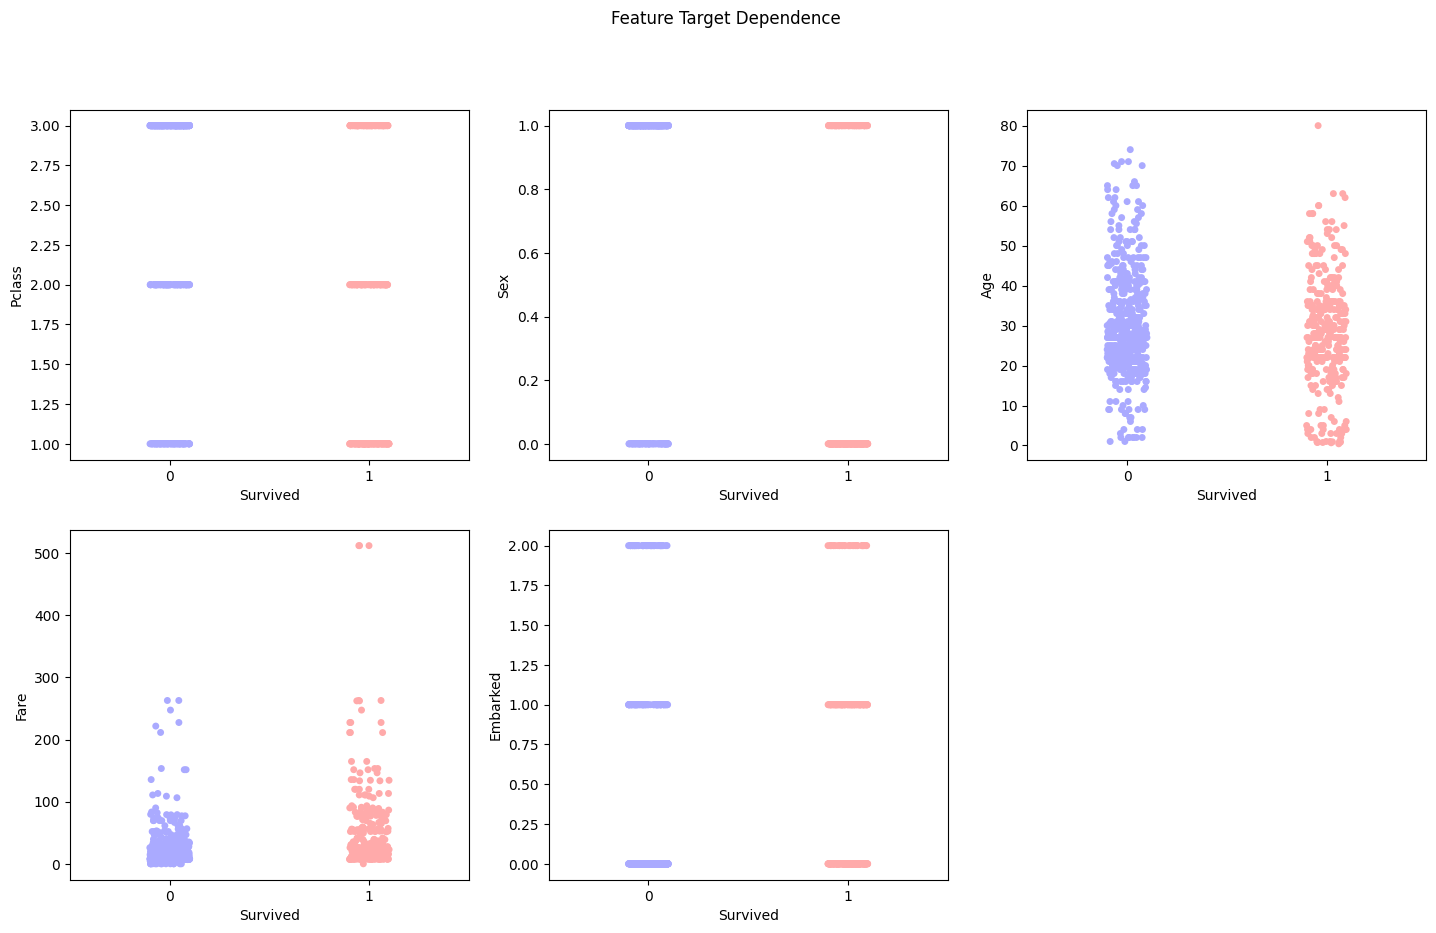

In [ ]:
figure, axes = plt.subplots(2, 3, figsize = (17.5, 10))
figure.delaxes(axes[1][2])
figure.suptitle("Feature Target Dependence")

#island
sns.stripplot(ax = axes[0, 0], data = data, x = "Survived", y = "Pclass", palette = "bwr")
sns.stripplot(ax = axes[0, 1], data = data, x = "Survived", y = "Sex", palette = "bwr")
sns.stripplot(ax = axes[0, 2], data = data, x = "Survived", y = "Age", palette = "bwr")
sns.stripplot(ax = axes[1, 0], data = data, x = "Survived", y = "Fare", palette = "bwr")
sns.stripplot(ax = axes[1, 1], data = data, x = "Survived", y = "Embarked", palette = "bwr")

SPLITTING DATASET

In [ ]:
y = data[["Survived"]]
X = data.drop(columns=["Survived"])
y.columns = ["Survived"]

print("Features:", "\n", X.head())
print("Target:", "\n", y.head())


Features: 
    Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    1  22.0      1      0   7.2500         0
1       1    0  38.0      1      0  71.2833         1
2       3    0  26.0      0      0   7.9250         0
3       1    0  35.0      1      0  53.1000         0
4       3    1  35.0      0      0   8.0500         0
Target: 
    Survived
0         0
1         1
2         1
3         1
4         0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 13)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state = 13)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)

Shape of X_train: (800, 7)
Shape of y_train: (800, 1)
Shape of X_test: (267, 7)
Shape of y_test: (267, 1)
Shape of X_val: (89, 7)
Shape of y_val: (89, 1)


IMPLEMENTING ENTROPY AS THE COST FUNCTION TO CALCULATE THE SPLIT

In [ ]:
def calculate_entropy(labels):
    unique_labels, label_counts = np.unique(labels, return_counts=True)
    probabilities = label_counts / len(labels)
    entropy = -np.sum(probabilities * np.log2(probabilities + 1e-10))  # Add a small value to avoid log(0)
    return entropy

In [ ]:
def calculate_information_gain_at_split(parent_labels, split_data, split_point):
    weighted_child_entropy = 0.0

    for child_labels in split_data:
        child_entropy = calculate_entropy(child_labels)
        child_weight = len(child_labels) / len(parent_labels)
        weighted_child_entropy += child_weight * child_entropy

    information_gain = calculate_entropy(parent_labels) - weighted_child_entropy
    return information_gain

In [ ]:
def find_best_split_for_column(features, target, column):
    unique_values = np.unique(features[column])
    best_information_gain = -1
    best_split_point = None

    if features[column].dtype in [np.float64, np.int64]:
        unique_values = np.sort(unique_values)
        split_points = (unique_values[1:] + unique_values[:-1]) / 2.0
    else:
        split_points = unique_values

    for split_point in split_points:
        split_data = [target[features[column] <= split_point], target[features[column] > split_point]]
        information_gain = calculate_information_gain_at_split(target, split_data, split_point)

        if information_gain > best_information_gain:
            best_information_gain = information_gain
            best_split_point = split_point

    return best_information_gain, best_split_point


In [ ]:
def find_best_split(features, target, columns):
    best_splits = {}

    for column in columns:
        information_gain, split_point = find_best_split_for_column(features, target, column)

        best_splits[information_gain] = {'column': column, 'split_point': split_point}

    return best_splits

In [ ]:
selected_columns = ['Pclass', 'Embarked', 'Sex']

# Split the dataset based on the specified columns
best_splits = find_best_split(data, data['Survived'], selected_columns)

print("Best Splits:")
for gain, details in best_splits.items():
    print(f"Column: {details['column']}, Information Gain: {gain}, Split Point: {details['split_point']}")

Best Splits:
Column: Pclass, Information Gain: 0.07475333655808336, Split Point: 2.5
Column: Embarked, Information Gain: 0.016352257508829737, Split Point: 0.5
Column: Sex, Information Gain: 0.21600805853994387, Split Point: 0.5


IMPLEMENTING THE DECISION TREE

In [ ]:
def find_best_split_at_unique_values(features, target, column, unique_values):
    best_information_gain = -1
    best_split_point = None

    for value in unique_values:
        split_data = [target[features[column] == value], target[features[column] != value]]
        information_gain = calculate_information_gain_at_split(target, split_data, value)

        if information_gain > best_information_gain:
            best_information_gain = information_gain
            best_split_point = value

    return best_information_gain, best_split_point

In [ ]:
def conTocat(features, target, column):
    unique_values = np.unique(features[column])

    # For continuous variables, convert to categorical and find best split point
    if features[column].dtype in [np.float64, np.int64]:
        unique_values = np.sort(unique_values)
        split_points = (unique_values[1:] + unique_values[:-1]) / 2.0
        best_information_gain = -1
        best_split_point = None

        for split_point in split_points:
            split_data = [target[features[column] <= split_point],
                          target[features[column] > split_point]]
            information_gain = calculate_information_gain_at_split(target, split_data, split_point)

            if information_gain > best_information_gain:
                best_information_gain = information_gain
                best_split_point = split_point

    # For categorical variables, use the original unique values
    else:
        best_information_gain, best_split_point = find_best_split_at_unique_values(features, target, column, unique_values)

    return best_information_gain, best_split_point

In [ ]:
selected_continuous_columns = ['Fare', 'Age', 'SibSp', 'Parch']
for column in selected_continuous_columns:
    information_gain, split_point = conTocat(data, data['Survived'], column)

    # Store the information gain, column name, and split point in the dictionary
    best_splits[information_gain] = {'column': column, 'split_point': split_point}

# Print the updated Best Splits dictionary
print("Updated Best Splits:")
for gain, details in best_splits.items():
    print(f"Column: {details['column']}, Information Gain: {gain}, Split Point: {details['split_point']}")

Updated Best Splits:
Column: Pclass, Information Gain: 0.07475333655808336, Split Point: 2.5
Column: Embarked, Information Gain: 0.016352257508829737, Split Point: 0.5
Column: Sex, Information Gain: 0.21600805853994387, Split Point: 0.5
Column: Fare, Information Gain: 0.06762493505811928, Split Point: 10.48125
Column: Age, Information Gain: 0.01689640772088996, Split Point: 6.5
Column: SibSp, Information Gain: 0.01025842705415081, Split Point: 3.5
Column: Parch, Information Gain: 0.015777560712624927, Split Point: 0.5


IMPLEMENTING THE TRAINING FUNCTION TO BUILD DECISION TREE

In [ ]:
def train_decision_tree(features, target, max_depth=None, current_depth=0):
    if max_depth is not None and current_depth >= max_depth:
        # If reached max depth, return the majority class as the leaf value
        return {'class': target.mode().iloc[0]} if not target.empty else {'class': None}

    best_splits = find_best_split(features, target, features.columns)

    if not best_splits or target.empty:
        # If no splits are possible or target is empty, return the majority class as the leaf value
        return {'class': target.mode().iloc[0]} if not target.empty else {'class': None}

    # Call conTocat to add values to best_splits
    for information_gain, details in best_splits.items():
        column = details['column']
        values = conTocat(features, target, column)
        details['values'] = values

    # Get the best split based on information gain
    best_split_gain = max(best_splits.keys())
    best_split_info = best_splits[best_split_gain]

    # Apply the split to the dataset
    split_column = best_split_info['column']
    split_point = best_split_info['split_point']

    if features[split_column].dtype in [np.float64, np.int64]:
        left_condition = features[split_column] <= split_point
        right_condition = features[split_column] > split_point
    else:
        left_condition = features[split_column] <= split_point
        right_condition = features[split_column] > split_point

    # Filter the dataset based on the split condition
    left_features = features.loc[left_condition]
    left_target = target.loc[left_condition]

    right_features = features.loc[right_condition]
    right_target = target.loc[right_condition]

    # Recursively build the decision tree for each branch
    left_branch = train_decision_tree(left_features, left_target, max_depth, current_depth + 1)

    right_branch = train_decision_tree(right_features, right_target, max_depth, current_depth + 1)

    return {'column': split_column, 'split_point': split_point,
            'left_branch': left_branch, 'right_branch': right_branch}


In [ ]:
tree = train_decision_tree(X, y, max_depth=3)
print(tree)

{'column': 'Sex', 'split_point': 0.5, 'left_branch': {'column': 'Pclass', 'split_point': 2.5, 'left_branch': {'column': 'Fare', 'split_point': 28.85625, 'left_branch': {'class': Survived    1
Name: 0, dtype: int64}, 'right_branch': {'class': Survived    1
Name: 0, dtype: int64}}, 'right_branch': {'column': 'Fare', 'split_point': 23.35, 'left_branch': {'class': Survived    1
Name: 0, dtype: int64}, 'right_branch': {'class': Survived    0
Name: 0, dtype: int64}}}, 'right_branch': {'column': 'Fare', 'split_point': 26.26875, 'left_branch': {'column': 'Age', 'split_point': 13.5, 'left_branch': {'class': Survived    1
Name: 0, dtype: int64}, 'right_branch': {'class': Survived    0
Name: 0, dtype: int64}}, 'right_branch': {'column': 'SibSp', 'split_point': 2.5, 'left_branch': {'class': Survived    0
Name: 0, dtype: int64}, 'right_branch': {'class': Survived    0
Name: 0, dtype: int64}}}}


Chechking the Decision Tree

In [ ]:
def infer(sample_df, decision_tree):
    if 'left_branch' not in decision_tree or 'right_branch' not in decision_tree:
        # If it's a leaf node, return the predicted class if available
        return decision_tree.get('class', None)

    split_column = decision_tree['column']
    split_point = decision_tree['split_point']


    if split_column in decision_tree.get('values', {}):
        sample_value = sample_df[split_column].iloc[0]
        return infer(sample_df, decision_tree['left_branch']) if sample_value <= split_point else infer(sample_df, decision_tree['right_branch'])
    else:
        sample_value = sample_df[split_column].iloc[0]
        return infer(sample_df, decision_tree['left_branch']) if sample_value <= split_point else infer(sample_df, decision_tree['right_branch'])

In [ ]:
# Example usage with DataFrame
sample_df = pd.DataFrame({'Pclass': [3], 'Sex': [1], 'Age': [22.0], 'SibSp': [1], 'Parch': [0], 'Fare': [7.25], 'Embarked': [0]})

prediction = infer(sample_df, tree)

if prediction is not None:
    if not prediction.empty and prediction.iloc[0] == 0:
        print("Predicted class for sample data: Not Survived")
    elif not prediction.empty and prediction.iloc[0] == 1:
        print("Predicted class for sample data: Survived")
    else:
        print("Invalid prediction value")
else:
    print("Unable to make a prediction")


Predicted class for sample data: Not Survived


Computing Accuracy, Confusion Matrix, F1 Score, Recall and Precession

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

def predict(tree, features):
    if 'class' in tree:
        return tree['class']

    column = tree['column']
    split_point = tree['split_point']

    if features[column].dtype in [np.float64, np.int64]:
        condition = features[column] <= split_point
    else:
        condition = features[column] == split_point

    if condition:
        return predict(tree['left_branch'], features)
    else:
        return predict(tree['right_branch'], features)

def compute_metrics(tree, features, target):
    predictions = features.apply(lambda x: predict(tree, x), axis=1)
    accuracy = accuracy_score(target, predictions)
    confusion_mat = confusion_matrix(target, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(target, predictions, average='binary')

    return accuracy, confusion_mat, precision, recall, f1

train_accuracy, train_confusion, train_precision, train_recall, train_f1 = compute_metrics(tree, X_train, y_train)
test_accuracy, test_confusion, test_precision, test_recall, test_f1 = compute_metrics(tree, X_test, y_test)

# Task-6: Compute Accuracy
print("Train Accuracy:", train_accuracy*100,"%")
print("Test Accuracy:", test_accuracy*100,"%")

# Task-7: Show Confusion Matrix
print("\nConfusion Matrix (Test Data):")
print(test_confusion)

# Task-8: Compute Precision, Recall, F1-score
print("\nPrecision, Recall, F1-score (Test Data):")
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", test_f1)


Train Accuracy: 82.5 %
Test Accuracy: 83.14606741573034 %

Confusion Matrix (Test Data):
[[143  12]
 [ 33  79]]

Precision, Recall, F1-score (Test Data):
Precision: 0.8681318681318682
Recall: 0.7053571428571429
F1-score: 0.7783251231527095


**QUESTION 2 LINEAR REGRESSION(1)**

Initial Data Visualization

In [ ]:
url = "https://raw.githubusercontent.com/devzohaib/Simple-Linear-Regression/master/tvmarketing.csv"
df = pd.read_csv(url)
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
      TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9


Plotting the scatter plot

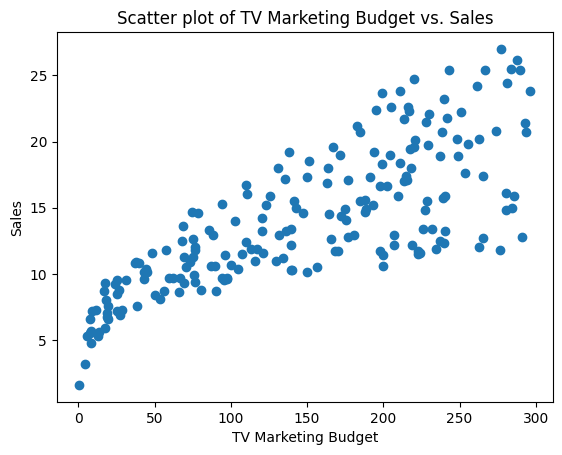

In [ ]:
plt.scatter(df['TV'], df['Sales'])
plt.title('Scatter plot of TV Marketing Budget vs. Sales')
plt.xlabel('TV Marketing Budget')
plt.ylabel('Sales')
plt.show()

Basic Statistical Measures

In [ ]:
tv_mean = df['TV'].mean()
sales_mean = df['Sales'].mean()
tv_std = df['TV'].std()
sales_std = df['Sales'].std()

print(f"TV Marketing Budget - Mean: {tv_mean}, Standard Deviation: {tv_std}")
print(f"Sales - Mean: {sales_mean}, Standard Deviation: {sales_std}")

TV Marketing Budget - Mean: 147.0425, Standard Deviation: 85.85423631490808
Sales - Mean: 14.0225, Standard Deviation: 5.217456565710478


Checking for missing values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

print("Missing values in the dataset:")
print(df.isnull().sum())

Missing values in the dataset:
TV       0
Sales    0
dtype: int64


Normalizing The Columns

In [ ]:
scaler = StandardScaler()
df[['TV', 'Sales']] = scaler.fit_transform(df[['TV', 'Sales']])

Splitting The Dataset

In [ ]:
X = df[['TV']]
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LINEAR REGRESSION IMPLEMENTATION

In [ ]:
def hypothesis(X, w0, w1):
    return w0 + w1 * X

def cost_function(X, y, w0, w1):
    m = len(X)
    return (1/(2*m)) * sum((hypothesis(X[i], w0, w1) - y[i])**2 for i in range(m))


def gradient_descent(X, y, w0, w1, learning_rate, epochs):
    m = len(X)
    for _ in range(epochs):
        # Calculate the hypothesis values outside the loop to avoid redundant computations
        hypotheses = hypothesis(X['TV'], w0, w1)

        w0 -= learning_rate * (1/m) * sum(hypotheses - y)
        w1 -= learning_rate * (1/m) * sum((hypotheses - y) * X['TV'])

    return w0, w1


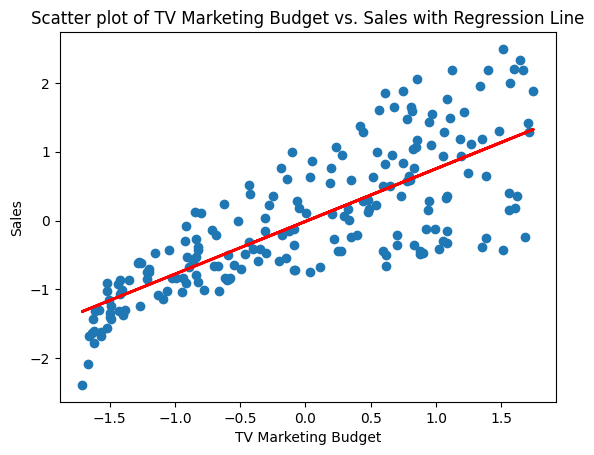

In [ ]:
w0, w1 = 0, 0
learning_rate = 0.01
epochs = 1000

if 'TV' in X_train.columns:
    w0, w1 = gradient_descent(X_train, y_train, w0, w1, learning_rate, epochs)
else:
    print("Column 'TV' not found in DataFrame.")


plt.scatter(df['TV'], df['Sales'])
plt.plot(X_train['TV'], hypothesis(X_train['TV'], w0, w1), color='red', linewidth=2)
plt.title('Scatter plot of TV Marketing Budget vs. Sales with Regression Line')
plt.xlabel('TV Marketing Budget')
plt.ylabel('Sales')
plt.show()


EVALUATION

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred = hypothesis(X_test['TV'], w0, w1)

mse = mean_squared_error(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error on the test split: {mse}")
print(f"Mean Absolute Error on the test split: {mae}")


Mean Squared Error on the test split: 0.37676010673859384
Mean Absolute Error on the test split: 0.46969724900376475


**QUESTION 3 LINEAR REGRESSION(2)**

Initial Data Visualization

In [ ]:
raw_df=pd.read_csv("/content/drive/MyDrive/ML Data/bostonHousingData - bostonHousingData.csv")

In [ ]:
raw_df.head

<bound method NDFrame.head of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90 

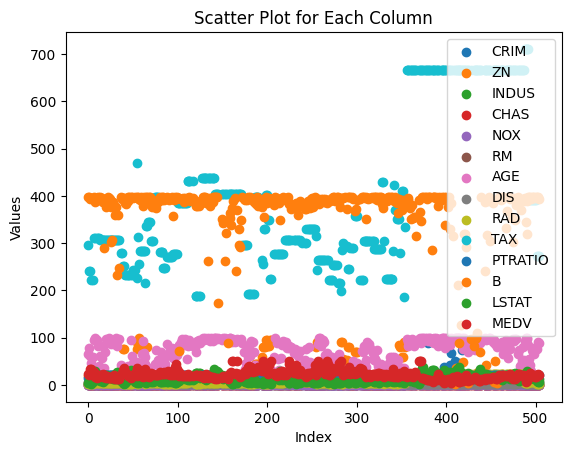

In [ ]:
df = raw_df.dropna()

for column in df.columns:
    plt.scatter(df.index, df[column], label=column)

# Set labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Scatter Plot for Each Column')

# Show legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
statistics = raw_df.describe()
print(statistics)

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.720192   23.388876    6.835896    0.255340    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081900    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.253715    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.560263   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  486.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.518519    3.795043    9.549407  408.237154   18.455534  356.674032   
std     27.999513    2.1057

In [ ]:
missing_values = raw_df.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)


Missing values in the dataset:
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [ ]:
raw_df = raw_df.fillna(raw_df.mean()) #filling every empty value with the column's mean

In [ ]:
missing_values = raw_df.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)

Missing values in the dataset:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


Normalizing columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print("Normalized DataFrame:")
print(df_normalized)


Normalized DataFrame:
         CRIM    ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0    0.000000  0.18  0.067815   0.0  0.309129  0.577505  0.641607  0.269203   
1    0.000236  0.00  0.242302   0.0  0.165975  0.547998  0.782698  0.348962   
2    0.000236  0.00  0.242302   0.0  0.165975  0.694386  0.599382  0.348962   
3    0.000293  0.00  0.063050   0.0  0.143154  0.658555  0.441813  0.448545   
4    0.000264  0.00  0.063050   0.0  0.143154  0.549722  0.574665  0.448545   
..        ...   ...       ...   ...       ...       ...       ...       ...   
389  0.001928  0.00  0.338343   0.0  0.406639  0.384748  0.727085  0.115514   
390  0.002451  0.00  0.338343   0.0  0.406639  0.472504  0.790937  0.124453   
391  0.000438  0.00  0.420455   0.0  0.381743  0.490324  0.760041  0.105293   
392  0.000612  0.00  0.420455   0.0  0.381743  0.654340  0.907312  0.094381   
393  0.001161  0.00  0.420455   0.0  0.381743  0.619467  0.889804  0.114514   

          RAD       TAX   PTR

Splitting into Train and Test

In [ ]:
z=raw_df
z_train, z_test,= train_test_split(z, test_size=0.2, random_state=42)

print("z_train shape:", z_train.shape)
print("z_test shape:", z_test.shape)

z_train shape: (404, 14)
z_test shape: (102, 14)


Multivariate Linear Regression

In [ ]:
def multivariate_hypothesis(X, weights, bias):
    return bias + np.dot(X, weights)

def multivariate_cost_function(X, y, bias, weights):
    m = len(X)
    predictions = multivariate_hypothesis(X, weights, bias)
    return (1/(2*m)) * np.sum((predictions - y)**2)

def multivariate_gradient_descent(X, y, bias, weights, learning_rate, epochs):
    m = len(X)
    for _ in range(epochs):
        predictions = multivariate_hypothesis(X, weights, bias)
        bias -= learning_rate * (1/m) * np.sum(predictions - y)
        weights -= learning_rate * (1/m) * np.dot(X.T, (predictions - y))

    return bias, weights



In [ ]:
# Normalize the data
scaler_multivariate = MinMaxScaler()
df_normalized_multivariate = pd.DataFrame(scaler_multivariate.fit_transform(raw_df), columns=raw_df.columns)

# Split the dataset into features (X) and target variable (y)
X_multivariate = df_normalized_multivariate.drop('MEDV', axis=1).values
y_multivariate = df_normalized_multivariate['MEDV'].values  # Target variable 'MEDV'

X_train_multivariate, X_test_multivariate, y_train_multivariate, y_test_multivariate = train_test_split(X_multivariate, y_multivariate, test_size=0.2, random_state=42)

# Set initial values for bias, weights, learning_rate, and epochs
bias_initial_multivariate = 0
weights_initial_multivariate = np.zeros(X_train_multivariate.shape[1])
learning_rate_multivariate = 0.01
epochs_multivariate = 1000

final_bias_multivariate, final_weights_multivariate = multivariate_gradient_descent(X_train_multivariate, y_train_multivariate, bias_initial_multivariate, weights_initial_multivariate, learning_rate_multivariate, epochs_multivariate)

print("Final bias:", final_bias_multivariate)
print("Final weights:", final_weights_multivariate)

Final bias: 0.17882561453839402
Final weights: [-0.0292631   0.07576528 -0.03511625  0.07814273 -0.02205816  0.23324229
  0.02536507  0.04894768 -0.03485661 -0.04926206 -0.04754438  0.18798591
 -0.12371679]


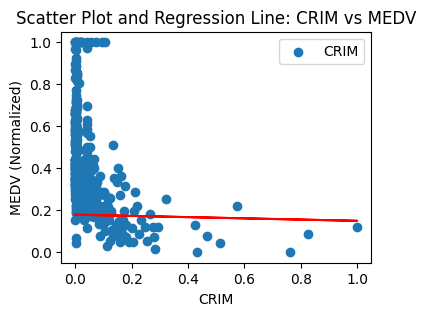

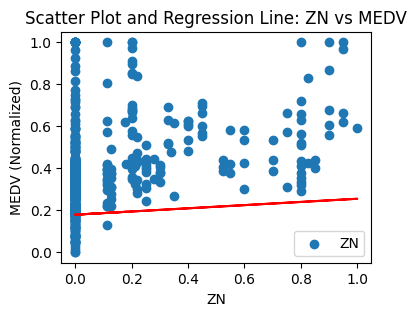

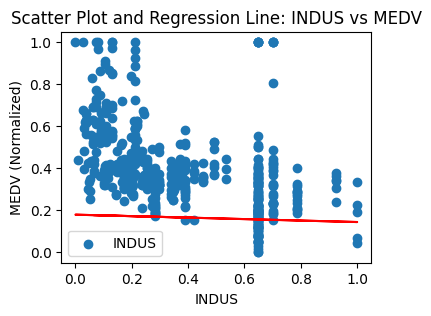

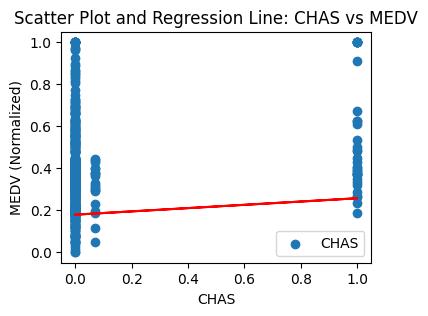

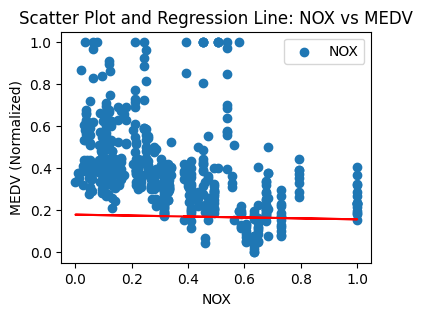

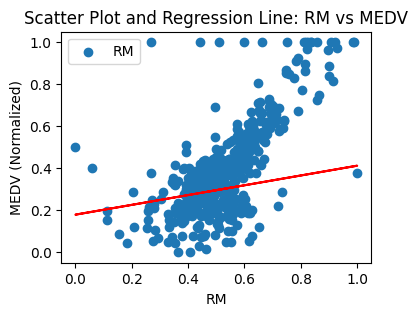

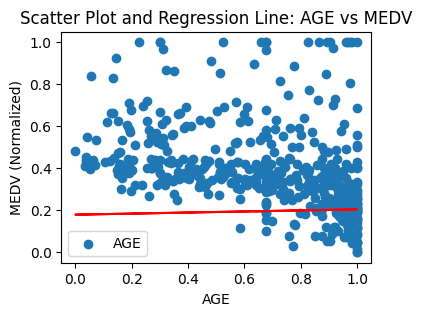

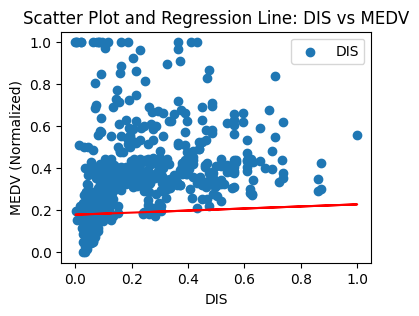

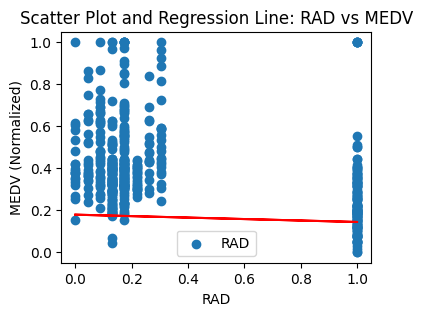

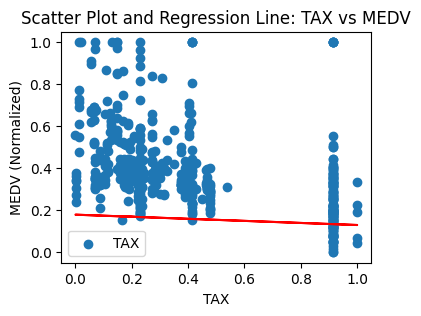

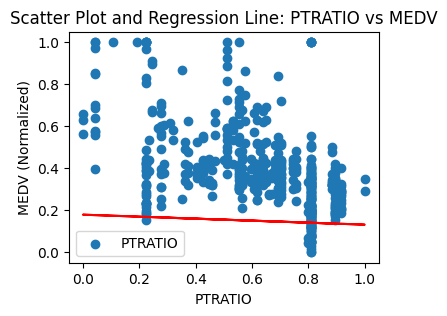

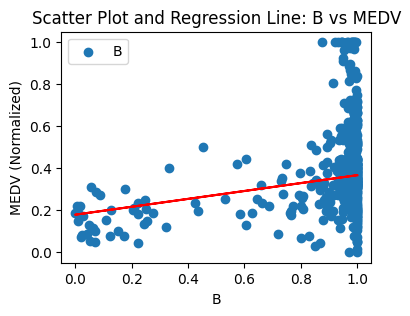

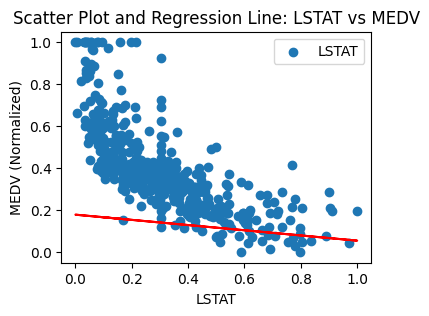

In [ ]:
# Plot regression lines on separate scatter plots for each feature
for feature_column_multivariate in df_normalized_multivariate.columns[:-1]:
    plt.figure(figsize=(4, 3))
    plt.scatter(df_normalized_multivariate[feature_column_multivariate], df_normalized_multivariate['MEDV'], label=feature_column_multivariate)

    regression_line_multivariate = final_bias_multivariate + final_weights_multivariate[df_normalized_multivariate.columns.get_loc(feature_column_multivariate)] * df_normalized_multivariate[feature_column_multivariate]

    regression_line_multivariate = np.squeeze(regression_line_multivariate)

    plt.plot(df_normalized_multivariate[feature_column_multivariate], regression_line_multivariate, color='red')

    plt.xlabel(feature_column_multivariate)
    plt.ylabel('MEDV (Normalized)')
    plt.title(f'Scatter Plot and Regression Line: {feature_column_multivariate} vs MEDV')
    plt.legend()
    plt.show()

Evaluation

In [ ]:
predictions_test = multivariate_hypothesis(X_test_multivariate, final_weights_multivariate, final_bias_multivariate)


mse_test = multivariate_cost_function(X_test_multivariate, y_test_multivariate, final_bias_multivariate, final_weights_multivariate)
print("Mean Squared Error (MSE) on Test Set:", mse_test)

mae_test = np.mean(np.abs(predictions_test - y_test_multivariate))
print("Mean Absolute Error (MAE) on Test Set:", mae_test)



Mean Squared Error (MSE) on Test Set: 0.009217708658194216
Mean Absolute Error (MAE) on Test Set: 0.0929106807995958
